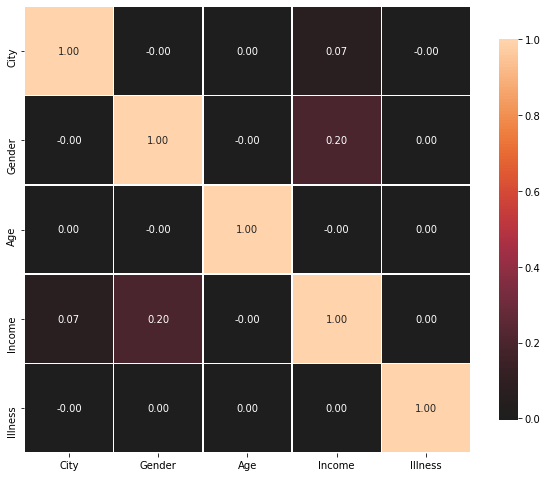

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train = pd.read_csv("~/Рабочий стол/Assignment3_DG/archive/toy.csv")

train["Gender"].value_counts()

cleanup_nums = {"City":     {"San Diego": 1, "Washington D.C.": 2, "Boston": 3, "Austin":4, "Mountain View": 5,
                           "Dallas": 6, "Los Angeles": 7, "New York City": 8 },
                "Gender":   {"Female": 0, "Male": 1 },
                "Illness":  {"No": 0, "Yes": 1} }

train = train.replace(cleanup_nums)
del train["Number"]

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

correlation_heatmap(train)

X_train, X_test, Y_train, Y_test = train_test_split(train[["City", "Age", "Gender", "Income"]], train.Illness, test_size = 0.1)
model = LogisticRegression()
model.fit(X_train, Y_train)
model.predict(X_test)